**HASOC - sinhala**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
import csv

#####Accessing dataset through the drive

In [ ]:
filename = '/content/drive/MyDrive/train_v2.csv'

try:
    train_data = pd.read_csv(filename, delimiter='\t')  # Load data as a DataFrame
except pd.errors.EmptyDataError:
    print("The file is empty or could not be loaded.")
except pd.errors.ParserError as e:
    print(f"Parser Error: {e}")

#####Preview of the dataset and understanding it

In [ ]:
train_data.head()

,post_id,text,label
0,726758237668659201,@USER @USER පට්ට පට පට...,NOT
1,915618589855617026,පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු 4යි. ...,HOF
2,925001070430040065,යාළුවා කියලා හිතන් සර් ගේ ඔලුවට රෙද්ද දාලා නෙල...,NOT
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා. විස්තර කතාකරමින් ඉදලා ම...,HOF
4,950376113150222336,"ඔය බනින්නෙ.. හරකා, මී හරකා කිය කිය...",HOF


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   post_id  7500 non-null   int64 
 1   text     7500 non-null   object
 2   label    7500 non-null   object
dtypes: int64(1), object(2)
memory usage: 175.9+ KB


#####Cleaning the dataset by removing all mentions, hashtags and other language text.

In [ ]:
def cleaning_text(df, text_field):
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|#|([A-Za-z0-9])|(\.+)|\t.+", "", elem))
  return df

In [ ]:
train = cleaning_text(train_data, "text")

In [ ]:
train

,post_id,text,label
0,726758237668659201,පට්ට පට පට,NOT
1,915618589855617026,පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු යි යා...,HOF
2,925001070430040065,යාළුවා කියලා හිතන් සර් ගේ ඔලුවට රෙද්ද දාලා නෙල...,NOT
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා මේ...,HOF
4,950376113150222336,"ඔය බනින්නෙ හරකා, මී හරකා කිය කිය",HOF
...,...,...,...
7495,930270216612872193,අද උදේ දැක්කා පට්ට ලස්සන හීනයක්,NOT
7496,1159471424613969921,කසල වෙන් කරලා දෙන්න පුරුදු වුනොත් වැඩේ ලේසි ...,NOT
7497,1073271775583100928,ඒත් පබාගේ පස්ස නම් ඉස්සෝ කොටුවක් උනත් දාන්න පු...,HOF
7498,1131018244733657088,සුදුවෑන්වලට මාරම මාර බයක් තියෙන ඈයෝ අන්තවාදයට...,HOF


In [ ]:
#saving this in the drive only for the purpose of crosschecking if all the unnecessary info is removed
output_filename = 'train.csv'
train.to_csv(output_filename, index=False, encoding='utf-8')

#####Removing stopwords

In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
def tfidf_feature(df, text_field):
  tfidf_vectorizer = TfidfVectorizer(max_features=1000)
  tfidf_features = tfidf_vectorizer.fit_transform(df[text_field])
  tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
  df_with_tfidf = pd.concat([df, tfidf_df], axis=1)
  return(df_with_tfidf)

new_df = tfidf_feature(train, 'text')
print(new_df)

                  post_id                                               text  \
0      726758237668659201                                         පට්ට පට පට   
1      915618589855617026  පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු යි යා...   
2      925001070430040065  යාළුවා කියලා හිතන් සර් ගේ ඔලුවට රෙද්ද දාලා නෙල...   
3     1397219745707986955  හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා මේ...   
4      950376113150222336                   ඔය බනින්නෙ හරකා, මී හරකා කිය කිය   
...                   ...                                                ...   
7495   930270216612872193                    අද උදේ දැක්කා පට්ට ලස්සන හීනයක්   
7496  1159471424613969921   කසල වෙන් කරලා දෙන්න පුරුදු වුනොත්  වැඩේ ලේසි ...   
7497  1073271775583100928  ඒත් පබාගේ පස්ස නම් ඉස්සෝ කොටුවක් උනත් දාන්න පු...   
7498  1131018244733657088  සුදුවෑන්වලට මාරම මාර බයක් තියෙන ඈයෝ  අන්තවාදයට...   
7499  1386977011198046209   වෙනි පෝස්ටුවෙන් පසු මොකක්ද යකෝ ඔය දාල තියෙන්න...   

     label   අක  අකම   අග  අගම   අච   අ

In [ ]:
#saving this in the drive only for the purpose of crosschecking if all the necessary info exists
output_filename = 'tfidf.csv'
new_df.to_csv(output_filename, index=False, encoding='utf-8')

In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named 'train_clean'

# Split the DataFrame into training and testing sets
train_1 = train.sample(frac=0.8, random_state=73)
test_1 = train.drop(train_1.index)

# Save the training and testing sets to CSV files
train_1.to_csv('train_1.csv', index=False)
test_1.to_csv('test_1.csv', index=False)

In [ ]:
train_1.head()

,post_id,text,label
1187,748888216367800321,ටහුඩු මම නම් වෝට් කරන්නේ නෑ,NOT
4990,711569238549368834,බැට් එකට වදින බෝලයක් බෝලයක් ගානේ පපුවෙ අමාරු හ...,NOT
5159,887722197552308228,යකෝ මගේ බඩුවක් ගන්න ගියා වගේනෙ !,NOT
913,1442439404404949000,බැන්දොත් බඳින්නෙ ඩේසිය වගේ නාකිවෙන්න වෙන්න කෑල...,HOF
5755,1127998077590106112,ඔබතුමා පාලනය අතට ගන්න අපට ඔබ විශ්වාසයි,NOT


In [ ]:
test_1.head()

,post_id,text,label
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා මේ...,HOF
7,715019979393863681,අඩො බර්ත්ඩේ එක දවසේ පු* පලාගන්න ආසද :,HOF
32,1137378811098484736,ෆෝන් එක ඔබ ඔබා ඉන්නෙ නැති එකක් දැක්කමද මංදා...,NOT
35,1164509759682351104,පුක කියන්නෙත් හොද මාර්කටින් ස්ට්‍රැජික් එකක් තමයි,HOF
38,1089761108985069569,ඩාලින් මම ඔයාටත් ෆේස් ස්ක්‍රබ් එකක් අරම් දෙන්...,NOT


In [ ]:
from collections import defaultdict as ddict
import csv
label_dict1 = {
    'NOT':0,
    'HOF':1
}

In [ ]:
def load_dataset(df="train_1.csv"):
  lines = []
  with open(df, "r") as f:
    reader = csv.reader(f)
    for line in reader:
      lines.append(line)
    tweet=[]
    label1 =[]
    dic_data = ddict(list)
    for (i,line) in enumerate(lines):
      if i==0:
        continue

      _tweet = line[1]
      _label1 = line[2]

      tweet.append(_tweet)
      label1.append(label_dict1[_label1])
    label_list1 = ["HOF", "NOT"]
    dic_data['tweet']=tweet
    dic_data['label1']=label1
    return dic_data,label_list1

In [ ]:
train_d, label_list1= load_dataset()
print(train_d['label1'][:5])

[0, 0, 0, 1, 0]


In [ ]:
train_d['label1'][:5]

[0, 0, 0, 1, 0]

In [ ]:
data = pd.DataFrame(
    {
        'X' : train_d['tweet'],
        'Y' : train_d['label1']
    }
)

In [ ]:
data

,X,Y
0,ටහුඩු මම නම් වෝට් කරන්නේ නෑ,0
1,බැට් එකට වදින බෝලයක් බෝලයක් ගානේ පපුවෙ අමාරු හ...,0
2,යකෝ මගේ බඩුවක් ගන්න ගියා වගේනෙ !,0
3,බැන්දොත් බඳින්නෙ ඩේසිය වගේ නාකිවෙන්න වෙන්න කෑල...,1
4,ඔබතුමා පාලනය අතට ගන්න අපට ඔබ විශ්වාසයි,0
...,...,...
5995,නෙදකින් මේ ගොනාගෙ කට ඉරියන් දවසින් දවස බෙල්ලෙ ...,0
5996,ඒක තැබිලි ගහක්දපොල් ගහක්ද මොනවද අයිසෙ ඔය බලන්න...,0
5997,පුදුම කාලකන්නි ටිකක් ඵනම් උන්ගෙ හිතෙ හමුදාව ක...,0
5998,නැනේ අඩේ උඹට මතක ද? මම එනකං ඉන්නකොට...,0


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
texts = data['X'].tolist()
labels = data['Y'].tolist()

In [ ]:
print(len(texts), len(labels))


6000 6000


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
labels = np.array(labels)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model architecture summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 86, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1674497 (6.39 MB)
Trainable params: 1674497 (6.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

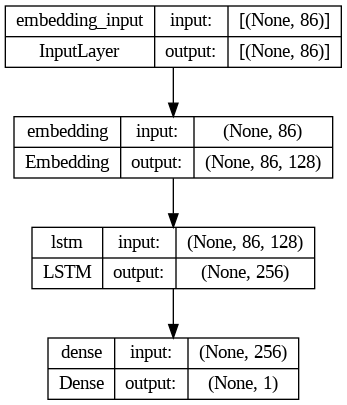

In [ ]:
img_file = './LSTM_1.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 35s 363ms/step - loss: 0.6566 - accuracy: 0.6123 - val_loss: 0.5823 - val_accuracy: 0.6842
Epoch 2/5
75/75 [==============================] - 23s 311ms/step - loss: 0.4517 - accuracy: 0.8079 - val_loss: 0.5454 - val_accuracy: 0.7617
Epoch 3/5
75/75 [==============================] - 20s 271ms/step - loss: 0.2314 - accuracy: 0.9131 - val_loss: 0.5551 - val_accuracy: 0.7633
Epoch 4/5
75/75 [==============================] - 20s 263ms/step - loss: 0.1196 - accuracy: 0.9613 - val_loss: 0.7043 - val_accuracy: 0.7592
Epoch 5/5
75/75 [==============================] - 17s 223ms/step - loss: 0.0666 - accuracy: 0.9802 - val_loss: 0.8571 - val_accuracy: 0.7500


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(units=1, activation='sigmoid'))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))  # Additional LSTM layer
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 79, 128)           1280000   
                                                                 
 lstm_3 (LSTM)               (None, 79, 128)           131584    
                                                                 
 dense_2 (Dense)             (None, 79, 1)             129       
                                                                 
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,428,674
Trainable params: 1,428,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 43s 509ms/step - loss: 0.6746 - accuracy: 0.5817 - val_loss: 0.6615 - val_accuracy: 0.6108
Epoch 2/5
75/75 [==============================] - 32s 435ms/step - loss: 0.5591 - accuracy: 0.7337 - val_loss: 0.5549 - val_accuracy: 0.7183
Epoch 3/5
75/75 [==============================] - 31s 417ms/step - loss: 0.3666 - accuracy: 0.8458 - val_loss: 0.6548 - val_accuracy: 0.7117
Epoch 4/5
75/75 [==============================] - 29s 390ms/step - loss: 0.2519 - accuracy: 0.9046 - val_loss: 0.6747 - val_accuracy: 0.7358
Epoch 5/5
75/75 [==============================] - 27s 362ms/step - loss: 0.1920 - accuracy: 0.9267 - val_loss: 0.7952 - val_accuracy: 0.7167


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))  # Additional LSTM layer
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 86, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 86, 256)           394240    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1871489 (7.14 MB)
Trainable params: 1871489 (7.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

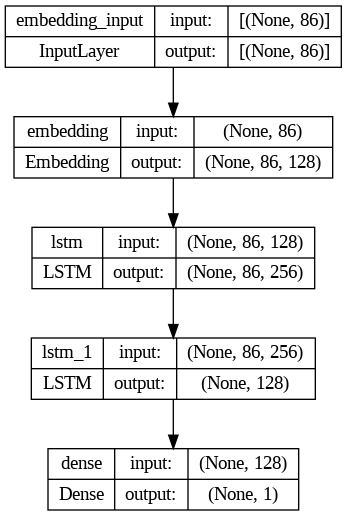

In [ ]:
img_file = './LSTM_arch1.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 44s 425ms/step - loss: 0.6420 - accuracy: 0.6377 - val_loss: 0.5462 - val_accuracy: 0.7558
Epoch 2/5
75/75 [==============================] - 30s 398ms/step - loss: 0.3461 - accuracy: 0.8598 - val_loss: 0.4969 - val_accuracy: 0.7700
Epoch 3/5
75/75 [==============================] - 36s 487ms/step - loss: 0.1679 - accuracy: 0.9375 - val_loss: 0.6726 - val_accuracy: 0.7658
Epoch 4/5
75/75 [==============================] - 27s 363ms/step - loss: 0.0937 - accuracy: 0.9681 - val_loss: 0.7492 - val_accuracy: 0.7342
Epoch 5/5
75/75 [==============================] - 27s 353ms/step - loss: 0.0620 - accuracy: 0.9798 - val_loss: 1.0587 - val_accuracy: 0.7350


In [ ]:
label_dict1 = {
    'NOT':0,
    'HOF':1
}
def load_dataset_test(df="test_1.csv"):
  lines = []
  with open(df, "r") as f:
    reader = csv.reader(f)
    for line in reader:
      lines.append(line)
    tweet=[]
    label1 =[]
    dic_data = ddict(list)
    for (i,line) in enumerate(lines):
      if i==0:
        continue

      _tweet = line[1]
      _label1 = line[2]

      tweet.append(_tweet)
      label1.append(label_dict1[_label1])
    label_list1 = ["HOF", "NOT"]
    dic_data['tweet']=tweet
    dic_data['label1']=label1
    return dic_data,label_list1
test_d, label_list1= load_dataset_test()
print(test_d['label1'][:5])

[1, 1, 0, 1, 0]


In [ ]:
data_test = pd.DataFrame(
    {
        'X' : test_d['tweet'],
        'Y' : test_d['label1']
    }
)
test_texts = data_test['X'].tolist()
test_labels = data_test['Y'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
test_labels = np.array(test_labels)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 7s 151ms/step
Testing Accuracy: 0.7447
Testing F1 Score: 0.7190


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
# Add Dense layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 79, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 75, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 37, 64)           0         
 )                                                               
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 25s 231ms/step - loss: 0.6561 - accuracy: 0.6192 - val_loss: 0.5765 - val_accuracy: 0.7142
Epoch 2/5
75/75 [==============================] - 13s 171ms/step - loss: 0.3803 - accuracy: 0.8415 - val_loss: 0.5217 - val_accuracy: 0.7542
Epoch 3/5
75/75 [==============================] - 12s 167ms/step - loss: 0.1669 - accuracy: 0.9360 - val_loss: 0.7679 - val_accuracy: 0.7192
Epoch 4/5
75/75 [==============================] - 11s 141ms/step - loss: 0.0804 - accuracy: 0.9692 - val_loss: 1.0980 - val_accuracy: 0.7275
Epoch 5/5
75/75 [==============================] - 9s 115ms/step - loss: 0.0378 - accuracy: 0.9850 - val_loss: 1.3479 - val_accuracy: 0.7233


**HIGHEST ACCURACY**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 86, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 82, 64)            41024     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 41, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,419,969
Trainable params: 1,419,969
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(padded_sequences, labels, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
75/75 [==============================] - 35s 287ms/step - loss: 0.6397 - accuracy: 0.6348 - val_loss: 0.5302 - val_accuracy: 0.7492
Epoch 2/2
75/75 [==============================] - 15s 202ms/step - loss: 0.3420 - accuracy: 0.8587 - val_loss: 0.5097 - val_accuracy: 0.7675


**-------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
import torch
!pip install transformers -q
!pip install tokenizers -q
!pip install datasets
from transformers import BertTokenizer, AutoTokenizer
from transformers import BertForSequenceClassification, AdamW, AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoModelWithLMHead, pipeline

! pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("keshan/SinhalaBERTo")
model = AutoModelForSequenceClassification.from_pretrained("keshan/SinhalaBERTo",num_labels=2)

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/721k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/334M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at keshan/SinhalaBERTo and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from keras.utils import plot_model

In [ ]:
from torch.utils.data import Dataset, DataLoader
class Dataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['X']
        label = self.data.iloc[index]['Y']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label)
        }

In [ ]:
df = pd.DataFrame(data)
df['max_token_count'] = df['X'].apply(lambda x: len(tokenizer.encode(x)))

# Find the maximum token count across all rows
max_tokens = df['max_token_count'].max()

print("Maximum token count:", max_tokens)
#=========================================================================================================

dataset = Dataset(data, tokenizer, max_length= max_tokens)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained model
model.to(device)

Maximum token count: 392


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [ ]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=0da38bc0622bcb6efd392d91ae4491d5d1b8cc472cc6b8543a79c151a067e18d
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


# **PROPOSED MODEL**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW

# Define your CNN and LSTM model architecture
class CNNLSTMModel(nn.Module):
    def __init__(self, model, cnn_kernel_size, lstm_hidden_size, num_labels, dropout_rate):
        super(CNNLSTMModel, self).__init__()
        self.bert = model
        self.cnn = nn.Conv1d(in_channels=model.config.hidden_size, out_channels=64, kernel_size=cnn_kernel_size)
        self.lstm = nn.LSTM(input_size=64, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, num_labels)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        bert_hidden_states = outputs.last_hidden_state  # Use the last hidden state from BERT

        # Permute dimensions for CNN
        cnn_input = bert_hidden_states.permute(0, 2, 1)
        cnn_output = self.cnn(cnn_input)

        # Permute dimensions for LSTM
        lstm_input = cnn_output.permute(0, 2, 1)
        lstm_output, _ = self.lstm(lstm_input)

        # Take the final hidden state from LSTM for classification
        lstm_final_hidden = lstm_output[:, -1, :]

        lstm_final_hidden = self.dropout(lstm_final_hidden)

        logits = self.fc(lstm_final_hidden)
        return logits

# Set hyperparameters
cnn_kernel_size = 3
lstm_hidden_size = 128
num_labels = 2
dropout_rate = 0.5

# Initialize your CNNLSTMModel
modell = CNNLSTMModel(model, cnn_kernel_size, lstm_hidden_size, num_labels, dropout_rate)
modell.to(device)

# Set training parameters
batch_size = 16
learning_rate = 2e-5
epochs = 1

# Create data loader
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    total_loss = 0
    model.train()

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)
        logits = outputs.logits  # Use the logits attribute

        loss = loss_fn(logits, labels)

        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(data_loader)
    print(f'Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}')


Epoch 1/1 - Loss: 0.5369


In [ ]:
pip install torchsummary


In [ ]:
# Assuming you have already defined and initialized your model (modell)
# modell = CNNLSTMModel(model, cnn_kernel_size, lstm_hidden_size, num_labels, dropout_rate)
# modell.to(device)

# Print model architecture
print(modell)


CNNLSTMModel(
  (bert): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(52000, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-5): 6 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Line

In [ ]:
print(dummy_input_ids.shape)
print(dummy_attention_mask.shape)


torch.Size([16, 86])
torch.Size([16, 86])


In [ ]:
import torch
print(torch.cuda.memory_summary(device=None, abbreviated=False))


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   1777 MiB |   5152 MiB |   5100 GiB |   5098 GiB |
|       from large pool |   1775 MiB |   5149 MiB |   5084 GiB |   5083 GiB |
|       from small pool |      2 MiB |      4 MiB |     15 GiB |     15 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   1777 MiB |   5152 MiB |   5100 GiB |   5098 GiB |
|       from large pool |   1775 MiB |   5149 MiB |   5084 GiB |

In [ ]:
modell.to(device)

CNNLSTMModel(
  (bert): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(52000, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-5): 6 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Line

In [ ]:
pip install torchsummary

In [ ]:
from torchsummary import summary
summary(model, input_size=(inputs['input_ids'].shape[1],), device=str(device))

RuntimeError: ignored

In [ ]:
import pandas as pd
import re
import csv

In [ ]:
from collections import defaultdict as ddict
import csv
label_dict1 = {
    'NOT':0,
    'HOF':1
}

In [ ]:
save_directory = "/content/drive/MyDrive/sinhala_proj/ensemble"
model.save_pretrained(save_directory)

In [ ]:
model_path = "/content/drive/MyDrive/sinhala_proj/ensemble"
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
def load_dataset(df="test_1.csv"):
  lines = []
  with open(df, "r") as f:
    reader = csv.reader(f)
    for line in reader:
      lines.append(line)
    tweet=[]
    label1 =[]
    dic_data = ddict(list)
    for (i,line) in enumerate(lines):
      if i==0:
        continue

      _tweet = line[1]
      _label1 = line[2]

      tweet.append(_tweet)
      label1.append(label_dict1[_label1])
    label_list1 = ["HOF", "NOT"]
    dic_data['tweet']=tweet
    dic_data['label1']=label1
    return dic_data,label_list1

In [ ]:
test_d, label_list1= load_dataset()
print(test_d['label1'][:5])

[1, 1, 0, 1, 0]


In [ ]:
datat = pd.DataFrame(
    {
        'X' : test_d['tweet'],
        'Y' : test_d['label1']
    }
)

In [ ]:
def get_accuracy(data_df, model, tokenizer, batch_size=16, device='cuda'):
    predicted_labels = []

    num_batches = (len(data_df) - 1) // batch_size + 1

    for i in range(num_batches):
        batch_texts = list(data_df['X'][i * batch_size: (i + 1) * batch_size])

        encoded_inputs = tokenizer.batch_encode_plus(batch_texts,
                                                     padding=True,
                                                     truncation=True,
                                                     max_length=508,
                                                     return_tensors='pt')

        with torch.no_grad():
            model.to(device)
            model_outputs = model(**encoded_inputs.to(device))

        batch_predicted_labels = torch.argmax(model_outputs.logits, dim=1)
        predicted_labels.extend(batch_predicted_labels.tolist())

    predicted_labels = predicted_labels[:len(data_df)]
    return np.array(predicted_labels)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

predictions = get_accuracy(datat, model, tokenizer)

y= np.array(datat['Y'])
F1_score = f1_score(y, predictions)
accuracy = accuracy_score(y, predictions)
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing F1 Score: {F1_score:.4f}')

Testing Accuracy: 0.8007
Testing F1 Score: 0.7555


Adding word2vec

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
text_data = data['X'].tolist()
sentences = [sent_tokenize(text) for text in text_data]
train_texts = []
for sentence_list in sentences:
    sentence_words = []
    for sentence in sentence_list:
        sentence_words.extend(word_tokenize(sentence))
    train_texts.append(sentence_words)
word2vec_model = Word2Vec(sentences=train_texts, vector_size=300, window=5, min_count=1, sg=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Create a Tokenizer and fit on the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust the vocabulary size if needed
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))  # 300 is the dimensionality of Word2Vec embeddings

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=300,  # Use the same dimensionality as your Word2Vec embeddings
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)  # Set to False to keep the custom embeddings fixed

model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 79, 300)           7678800   
                                                                 
 conv1d_6 (Conv1D)           (None, 75, 64)            96064     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 37, 64)           0         
 1D)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 128)               98816     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                     

In [ ]:
odel.fit(padded_sequences, labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 10s 100ms/step - loss: 0.6745 - accuracy: 0.5815 - val_loss: 0.6755 - val_accuracy: 0.5767
Epoch 2/10
75/75 [==============================] - 7s 92ms/step - loss: 0.6683 - accuracy: 0.5938 - val_loss: 0.6715 - val_accuracy: 0.5742
Epoch 3/10
75/75 [==============================] - 7s 95ms/step - loss: 0.6673 - accuracy: 0.5896 - val_loss: 0.6676 - val_accuracy: 0.5858
Epoch 4/10
75/75 [==============================] - 7s 89ms/step - loss: 0.6679 - accuracy: 0.5896 - val_loss: 0.6728 - val_accuracy: 0.5992
Epoch 5/10
75/75 [==============================] - 7s 96ms/step - loss: 0.6665 - accuracy: 0.5921 - val_loss: 0.6686 - val_accuracy: 0.5892
Epoch 6/10
75/75 [==============================] - 7s 88ms/step - loss: 0.6643 - accuracy: 0.5942 - val_loss: 0.6700 - val_accuracy: 0.5758
Epoch 7/10
75/75 [==============================] - 7s 99ms/step - loss: 0.6642 - accuracy: 0.5938 - val_loss: 0.6685 - val_accuracy: 0.5908
Epoch 8/10


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=300,  # Use the same dimensionality as your Word2Vec embeddings
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)  # Set to False to keep the custom embeddings fixed

model1 = Sequential()
model1.add(embedding_layer)
model1.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 86, 300)           7702500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7922277 (30.22 MB)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 7702500 (29.38 MB)
_________________________________________________________________


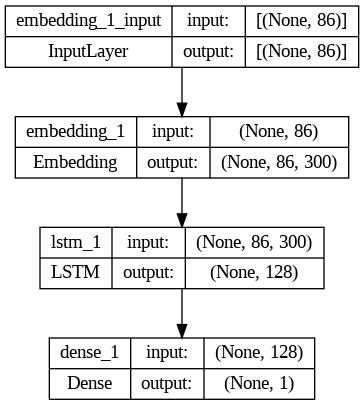

In [ ]:
img_file = './LSTM_2.png'

tf.keras.utils.plot_model(model1, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model1.fit(padded_sequences, labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 14s 159ms/step - loss: 0.6763 - accuracy: 0.5869 - val_loss: 0.6732 - val_accuracy: 0.5883
Epoch 2/10
75/75 [==============================] - 11s 148ms/step - loss: 0.6722 - accuracy: 0.5881 - val_loss: 0.6721 - val_accuracy: 0.5767
Epoch 3/10
75/75 [==============================] - 10s 138ms/step - loss: 0.6691 - accuracy: 0.5935 - val_loss: 0.6685 - val_accuracy: 0.5808
Epoch 4/10
75/75 [==============================] - 12s 154ms/step - loss: 0.6671 - accuracy: 0.5896 - val_loss: 0.6703 - val_accuracy: 0.5708
Epoch 5/10
75/75 [==============================] - 12s 154ms/step - loss: 0.6658 - accuracy: 0.5969 - val_loss: 0.6697 - val_accuracy: 0.5733
Epoch 6/10
75/75 [==============================] - 12s 163ms/step - loss: 0.6636 - accuracy: 0.5925 - val_loss: 0.6687 - val_accuracy: 0.5675
Epoch 7/10
75/75 [==============================] - 11s 153ms/step - loss: 0.6635 - accuracy: 0.5979 - val_loss: 0.6672 - val_accuracy: 0.5850

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model2 = Sequential()

# Add an Embedding layer
model2.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(LSTM(units=256, dropout=0.5, recurrent_dropout=0.5))

model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 86, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 82, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1  (None, 41, 64)            0         
 D)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 256)               328704    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1649985 (6.29 MB)
Trainable params: 1649985 (6.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

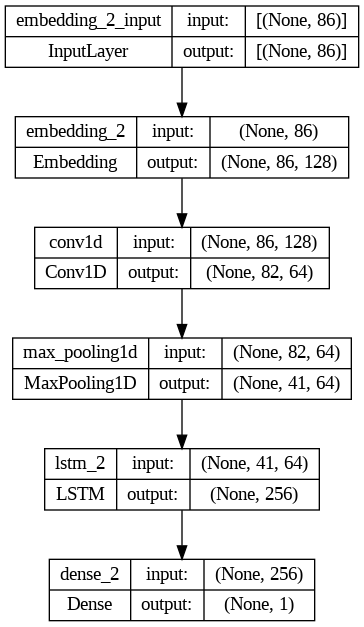

In [ ]:
img_file = './LSTMCNN_1.png'

tf.keras.utils.plot_model(model2, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model2.fit(padded_sequences, labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 22s 246ms/step - loss: 0.6566 - accuracy: 0.6194 - val_loss: 0.5752 - val_accuracy: 0.7050
Epoch 2/10
75/75 [==============================] - 14s 191ms/step - loss: 0.4010 - accuracy: 0.8283 - val_loss: 0.5375 - val_accuracy: 0.7642
Epoch 3/10
75/75 [==============================] - 12s 163ms/step - loss: 0.1913 - accuracy: 0.9267 - val_loss: 0.6758 - val_accuracy: 0.7358
Epoch 4/10
75/75 [==============================] - 10s 140ms/step - loss: 0.1008 - accuracy: 0.9633 - val_loss: 0.9983 - val_accuracy: 0.7250
Epoch 5/10
75/75 [==============================] - 9s 123ms/step - loss: 0.0562 - accuracy: 0.9796 - val_loss: 1.2692 - val_accuracy: 0.7342
Epoch 6/10
75/75 [==============================] - 9s 122ms/step - loss: 0.0365 - accuracy: 0.9862 - val_loss: 1.6544 - val_accuracy: 0.7058
Epoch 7/10
75/75 [==============================] - 7s 94ms/step - loss: 0.0324 - accuracy: 0.9858 - val_loss: 1.5744 - val_accuracy: 0.7167
Epo

# **ML MODELS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier


In [ ]:
def train_and_test_models(X, y, test_size=0.2, random_state=42):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the models
    models = [
        ('Logistic Regression', LogisticRegression(max_iter=2000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('SVM', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Gaussian Naive Bayes', GaussianNB()),
        ('Neural Network', MLPClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier())
    ]

    # Initialize an empty list to store the results and models
    results = []
    trained_models = {}

    # Train and test each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        results.append((name, train_accuracy, test_accuracy, f1))
        trained_models[name] = model

    # Create a DataFrame to store the results
    results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score'])

    return results_df, trained_models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'texts' is a list of text data
texts = data['X'].tolist()
labels = data['Y'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Use TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Check the shapes of the datasets
print(X_train_tfidf.shape, len(y_train), X_test_tfidf.shape, len(y_test))

# If the shapes are consistent, proceed with training and testing
results_df, trained_models = train_and_test_models(X_train_tfidf, y_train)

# Print the results DataFrame
print(results_df)

(4800, 3704) 4800 (1200, 3704) 1200


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                  Model  Train Accuracy  Test Accuracy  F1 Score
0   Logistic Regression        0.789844       0.683333  0.569405
1         Decision Tree        0.996094       0.639583  0.568579
2         Random Forest        0.996094       0.705208  0.585652
3                   SVM        0.945312       0.683333  0.548961
4   K-Nearest Neighbors        0.613021       0.587500  0.168067
5  Gaussian Naive Bayes        0.703906       0.486458  0.576824
6        Neural Network        0.995833       0.632292  0.576230
7              AdaBoost        0.717187       0.678125  0.559201
8     Gradient Boosting        0.753906       0.684375  0.531685
9               XGBoost        0.879687       0.680208  0.571827


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = vectorizer.transform(X_val).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Check the shapes of the datasets
print(X_train_tfidf.shape, len(y_train), X_val_tfidf.shape, len(y_val), X_test_tfidf.shape, len(y_test))

# If the shapes are consistent, proceed with training and testing
results_train, trained_models = train_and_test_models(X_train_tfidf, y_train)
results_val, _ = train_and_test_models(X_val_tfidf, y_val)

# Use TF-IDF vectorizer on the test dataset
X_test_tfidf_new = vectorizer.transform(test_texts).toarray()

# Evaluate the models on the new test dataset
results_test, _ = train_and_test_models(X_test_tfidf_new, test_labels)

# Print the results DataFrames
print("Training Results:")
print(results_train)

print("\nValidation Results:")
print(results_val)

print("\nTesting Results:")
print(results_test)


(4800, 3704) 4800 (600, 3704) 600 (600, 3704) 600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Results:
                  Model  Train Accuracy  Test Accuracy  F1 Score
0   Logistic Regression        0.789844       0.683333  0.569405
1         Decision Tree        0.996094       0.634375  0.567201
2         Random Forest        0.996094       0.696875  0.571429
3                   SVM        0.945312       0.683333  0.548961
4   K-Nearest Neighbors        0.613021       0.587500  0.168067
5  Gaussian Naive Bayes        0.703906       0.486458  0.576824
6        Neural Network        0.996094       0.631250  0.573494
7              AdaBoost        0.717187       0.678125  0.559201
8     Gradient Boosting        0.754427       0.686458  0.533333
9               XGBoost        0.879687       0.680208  0.571827

Validation Results:
                  Model  Train Accuracy  Test Accuracy  F1 Score
0   Logistic Regression        0.870833       0.700000  0.437500
1         Decision Tree        0.997917       0.683333  0.558140
2         Random Forest        0.997917       0.683

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = vectorizer.transform(X_val).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Check the shapes of the datasets
print(X_train_tfidf.shape, len(y_train), X_val_tfidf.shape, len(y_val), X_test_tfidf.shape, len(y_test))

# If the shapes are consistent, proceed with training
results_train, trained_models = train_and_test_models(X_train_tfidf, y_train)

# Use TF-IDF vectorizer on the test dataset
X_test_tfidf_new = vectorizer.transform(test_texts).toarray()

# Evaluate the models on the new test dataset
results_test = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score'])
for name, model in trained_models.items():
    y_test_pred = model.predict(X_test_tfidf_new)
    test_accuracy = accuracy_score(test_labels, y_test_pred)
    f1 = f1_score(test_labels, y_test_pred)
    results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)

# Print the results DataFrames
print("Training Results:")
print(results_train)

print("\nTesting Results:")
print(results_test)

(4800, 3704) 4800 (600, 3704) 600 (600, 3704) 600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)
<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)
<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

Training Results:
                  Model  Train Accuracy  Test Accuracy  F1 Score
0   Logistic Regression        0.789844       0.683333  0.569405
1         Decision Tree        0.996094       0.622917  0.563855
2         Random Forest        0.996094       0.697917  0.572271
3                   SVM        0.945312       0.683333  0.548961
4   K-Nearest Neighbors        0.613021       0.587500  0.168067
5  Gaussian Naive Bayes        0.703906       0.486458  0.576824
6        Neural Network        0.996094       0.634375  0.579641
7              AdaBoost        0.717187       0.678125  0.559201
8     Gradient Boosting        0.753906       0.690625  0.539535
9               XGBoost        0.879687       0.680208  0.571827

Testing Results:
                  Model Train Accuracy  Test Accuracy  F1 Score
0   Logistic Regression           None       0.684000  0.574506
1         Decision Tree           None       0.612667  0.541436
2         Random Forest           None       0.669333  0.

<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)
<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)
<ipython-input-67-d8cb54429c8b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append({'Model': name, 'Train Accuracy': None, 'Test Accuracy': test_accuracy, 'F1 Score': f1}, ignore_index=True)


In [ ]:
print(len(texts), len(labels))

6000 6000
